# **TRABAJO FINAL MÓDULO 1**
https://www.kaggle.com/datasets/andrewmvd/ocular-disease-recognition-odir5k

# **DEFINICIÓN**
*   El proyecto final es una oportunidad para que usted y su equipo implementen lo aprendido durante las últimas semanas. Deberán trabajar colaborativamente con su equipo para proponer un módulo de gestión de imágenes y su metadata para un proyecto de investigación de imagenología médica.
*   Acerca de los datos, todos los equipos deberán utilizar uno el dataset asignado en la lista de equipos.
*   La tarea para este proyecto consiste en desarrollar un módulo de
registro/modificación/eliminación de imágenes y sus metadatos usando
estructuras de datos, programación orientada a objetos, versionamiento de código, programación modular y buenas prácticas de programación como ser documentación.
*   El desafío principal para este proyecto final está enfocado en su estrategía de modularización y de aplicación de las buenas prácticas vistas en el curso. Por lo tanto, será suficiente implementar el paquete con las siguientes interfaces de interacción con el usuario: funciones de captura y visualización de datos por la terminal (input(), print(), etc).




# **ENTREGABLES**
La entrega debe ser enviada por un solo miembro de equipo.

*   **Código (50%)**
Para enviar su proyecto, deberá comprimir en un archivo .zip su: script(s) y notebook(s) en formatos .py y .ipynb, respectivamente. Su código deberá estar bien documentado siguiendo las buenas prácticas de PEP8.

*   **Video (50%)**
Se deberán explicar los siguientes puntos:

1.   Su diagrama de clases y de organización de módulos. Además, también puede describir aquí su implementación de versionamiento de código.
2.   Describa las principales funcionalidades de su sistema y sus estrategías de documentación.



## 1. Descargar un dataset desde Kaggle

Ocular Disease Intelligent Recognition (ODIR) is a structured ophthalmic database of 5,000 patients with age, color fundus photographs from left and right eyes and doctors' diagnostic keywords from doctors.

This dataset is meant to represent ‘‘real-life’’ set of patient information collected by Shanggong Medical Technology Co., Ltd. from different hospitals/medical centers in China. In these institutions, fundus images are captured by various cameras in the market, such as Canon, Zeiss and Kowa, resulting into varied image resolutions.
Annotations were labeled by trained human readers with quality control management. They classify patient into eight labels including:

- **Normal (N)**
- **Diabetes (D)**
- **Glaucoma (G)**
- **Cataract (C)**
- **Age related Macular Degeneration (A)**
- **Hypertension (H)**
- **Pathological Myopia (M)**
- **Other diseases/abnormalities (O)**

In [1]:
# Importar dependencias

# La librería JSON permite abrir y guardar archivos en formato JSON
import json
# Sklearn cuenta con una herramienta para dividir un dataset
# en un subconjunto de entrenamiento y un subconjunto de evaluación
# Ambos, son importantes para el trabajo con aprendizaje automatico
from sklearn.model_selection import train_test_split
# os es una librería propia de Python que permite precesar archivos
import os
# La librería TQDM permite integrar barras de progreso en estructuras repetitivas for
from tqdm.auto import tqdm
# La librería shutil tiene implementaciones optimizadas para trabajar con archivos
import shutil
# La librería random permite crear números aleatorios
import random
# La librería OpenCV contiene funciones y algoritmos para procesar imágenes y video
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from google.colab import userdata

# Definir las credenciales para acceder a Kaggle. Primero requerimos confirmar que
# el archivo aún no ha sido creado
KAGGLE_PATH = "/root/.kaggle"
if os.path.exists(KAGGLE_PATH):
  !rm -r "$KAGGLE_PATH"

!mkdir "$KAGGLE_PATH"
!touch "$KAGGLE_PATH/kaggle.json"

# Puedes crear tu propio token y username de la API de Kaggle en https://www.kaggle.com/
api_token = {"username":"josealfredoarroyo","key":userdata.get('key_kaggle')}

# Crear un archivo con las credenciales, de tal forma que kaggle pueda leerlas facilmente
with open(KAGGLE_PATH+'/kaggle.json', 'w') as file:
    json.dump(api_token, file)

# Cambiar los permisos de acceso del nuevo archivo con credenciales
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
%cd /content

# Comprobar si el conjunto de datos ya se ha descargado
if os.path.exists('./odir'):
  !rm -rf city_problems
os.makedirs('odir')

# Descargar el dataset desde Kaggle de ODIR (Ocular Disease Recognition)
!kaggle datasets download -d andrewmvd/ocular-disease-recognition-odir5k -p odir

/content
Dataset URL: https://www.kaggle.com/datasets/andrewmvd/ocular-disease-recognition-odir5k
License(s): other
 98% 1.59G/1.62G [00:11<00:00, 196MB/s]
100% 1.62G/1.62G [00:11<00:00, 156MB/s]


In [3]:
# Descomprimir Archivo Odir
!unzip -qn '/content/odir/ocular-disease-recognition-odir5k.zip' -d /content/odir
!rm /content/odir/ocular-disease-recognition-odir5k.zip

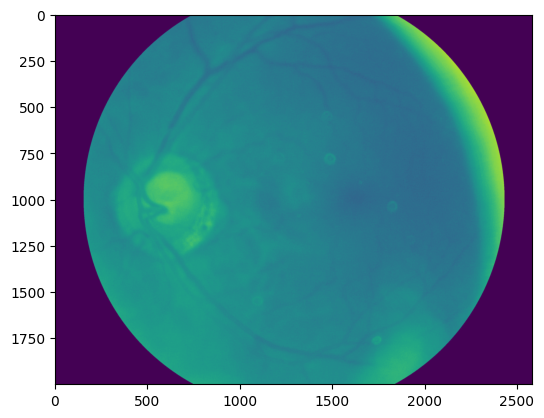

In [5]:
# Probando el dataset
import glob
import random
import cv2
import matplotlib.pyplot as plt

train_images = glob.glob("/content/odir/ODIR-5K/ODIR-5K/Training Images/*.jpg")
test_images = glob.glob("/content/odir/ODIR-5K/ODIR-5K/Testing Images/*.jpg")
all_images = train_images + test_images

num = random.randint(0,len(all_images))

image = cv2.imread(all_images[num],0)
plt.imshow(image);